In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dask.array
import cartopy.crs as ccrs
import matplotlib.colors as colors
import datetime as dt
from matplotlib.colors import BoundaryNorm
rb = plt.cm.RdBu
bm = plt.cm.Blues
best_blue = '#9bc2d5'
recherche_red = '#fbc4aa'
wondeful_white = '#f8f8f7'
import glob
import pdb

import warnings
warnings.filterwarnings('ignore')

import matplotlib.gridspec as gridspec

In [115]:
savedir = 'images/rmm/'

In [2]:
import sys
from importlib import reload
sys.path.append('/home/563/ab2313/MJO/functions')

import phase_calc_functions as phase_calc
import phase_plot_functions as phase_plot

In [6]:
import mystats

In [3]:
rmm = phase_calc.load_rmm()

# Phase Count

In [4]:
phase_count = phase_calc.count_in_rmm_phase(rmm)

In [87]:
phase_count = phase_count.sel(year = slice(1976, 2019))

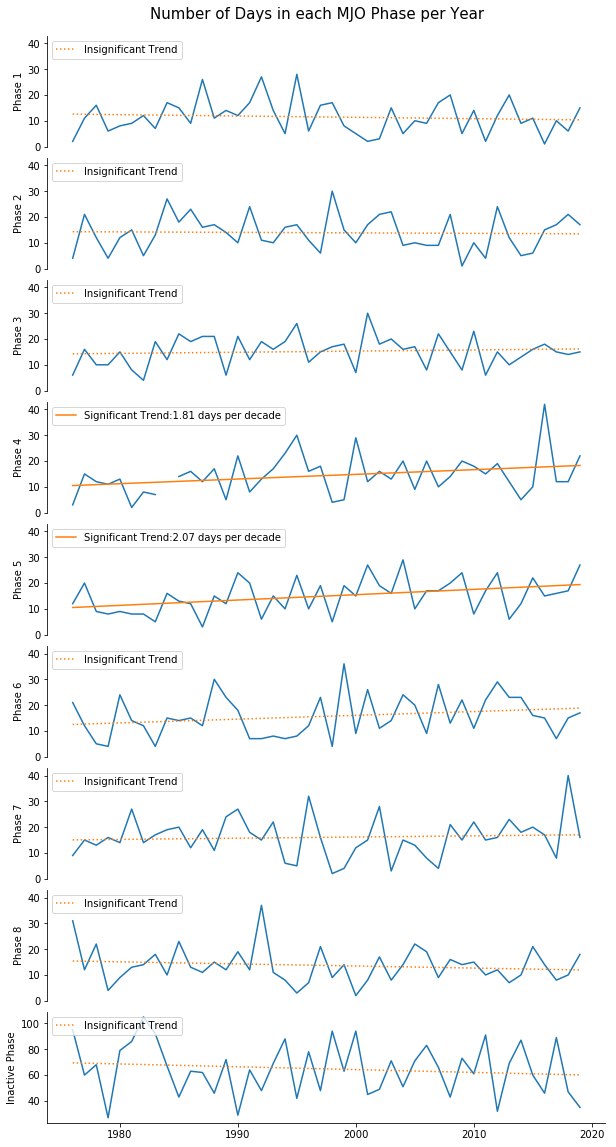

In [126]:
fig = plt.figure(figsize = (10,20))
gs = gridspec.GridSpec(9,1, hspace = 0.1)

for i,phase in enumerate(phase_count.phase.values):
    ax = fig.add_subplot(gs[i])
    
    sub = phase_count.sel(phase = phase).number
    x = sub.year.values
    y = sub.values

    raw = ax.plot(x,y, label = None)
    
    
    idx = np.isfinite(x) & np.isfinite(y)
    x = x[idx]
    y = y[idx]

    z = np.polyfit(x,y,1)
    p = np.poly1d(z)
    
    sig = mystats.mann_kendall(y)  

    if sig < 0.1:
        linestyle = '-'
        label = 'Significant Trend:' + str(np.round(z[0] * 10,2)) + ' days per decade'  
    else:
        linestyle = ':'
        label = 'Insignificant Trend'
    
    trend = ax.plot(x, p(x), label = label, linestyle = linestyle) 

    

    # Defining titles
    if i == 8:
        ax.set_ylabel('Inactive Phase')
    else:
        ax.set_ylabel('Phase ' + phase)
        ax.set_ylim(0,43)
        ax.spines['bottom'].set_visible(False)
        ax.set_xticks([])
    
        
    ax.legend(loc = 'upper left')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

title = 'Number of Days in each MJO Phase per Year'
fig.suptitle(title, y =0.9, fontsize = 15 );


fig.savefig(savedir + title + '.png', dpi = 300)

# Subphase

In [120]:
import trend_functions as tf

In [121]:

subphase_count = tf.count_in_rmm_subphsae(rmm)

In [123]:
subphase_count = subphase_count.sel(year = slice(1976, 2019))

In [124]:
subphase_count 

<xarray.Dataset>
Dimensions:  (phase: 4, year: 44)
Coordinates:
  * phase    (phase) <U10 'enhanced' 'suppressed' 'transition' 'inactive'
  * year     (year) int64 1976 1977 1978 1979 1980 ... 2015 2016 2017 2018 2019
Data variables:
    number   (phase, year) int64 42 47 27 28 47 49 34 ... 69 87 60 46 89 47 35

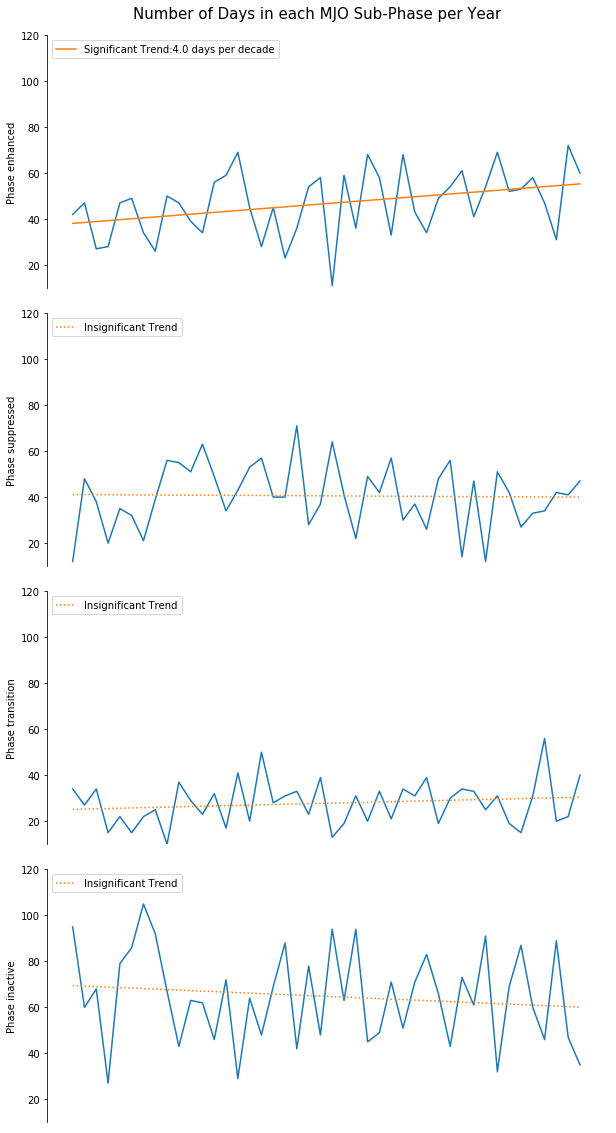

In [130]:
fig = plt.figure(figsize = (10,20))
gs = gridspec.GridSpec(4,1, hspace = 0.1)

for i,phase in enumerate(subphase_count.phase.values):
    ax = fig.add_subplot(gs[i])
    
    sub = subphase_count.sel(phase = phase).number
    x = sub.year.values
    y = sub.values

    raw = ax.plot(x,y, label = None)
    
    
    idx = np.isfinite(x) & np.isfinite(y)
    x = x[idx]
    y = y[idx]

    z = np.polyfit(x,y,1)
    p = np.poly1d(z)
    
    sig = mystats.mann_kendall(y)  

    if sig < 0.1:
        linestyle = '-'
        label = 'Significant Trend:' + str(np.round(z[0] * 10,2)) + ' days per decade'  
    else:
        linestyle = ':'
        label = 'Insignificant Trend'
    
    trend = ax.plot(x, p(x), label = label, linestyle = linestyle) 

    ax.set_ylim(10,120)

    # Defining titles
    if i == 4:
        ax.set_ylabel('Inactive Phase')
    else:
        ax.set_ylabel('Phase ' + phase)
 
        ax.spines['bottom'].set_visible(False)
        ax.set_xticks([])
    
        
    ax.legend(loc = 'upper left')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

title = 'Number of Days in each MJO Sub-Phase per Year'
fig.suptitle(title, y =0.9, fontsize = 15 );


fig.savefig(savedir + title + '.png', dpi = 300)